In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt
fp = fastf1.get_session(2023, "Spain", 'FP2')
fp.load()

In [150]:
drivers = ["VER", "ALO", "LEC", "HAM", "SAI", "RUS"]
driver_laps = fp.laps.pick_drivers(drivers)
driver_laps = driver_laps.loc[((driver_laps['Driver'] == "VER")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "ALO")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "LEC")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "HAM")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "SAI")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "RUS")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4))]
driver_laps = driver_laps.reset_index()

In [151]:
finishing_order = [fp.get_driver(i)["Abbreviation"] for i in drivers]
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

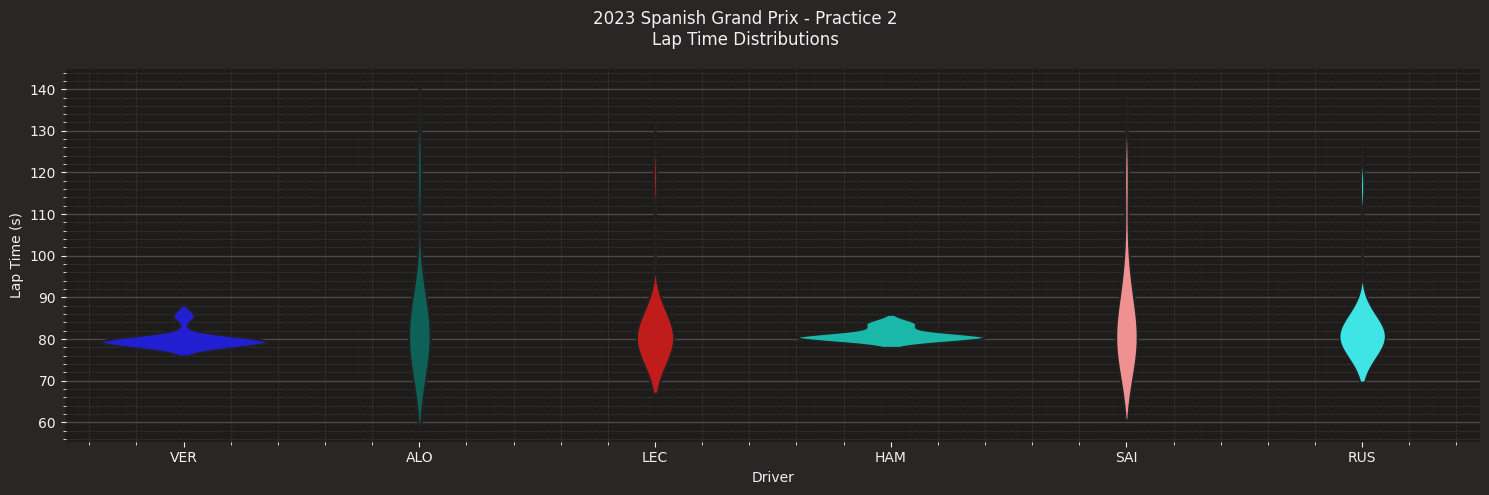

In [152]:
from fastf1 import plotting
plotting.setup_mpl()
# create the figure
fig, ax = plt.subplots(figsize=(15, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors
               )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle(f"{fp.event.year} {fp.event.EventName} - {fp.name}\nLap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [169]:
drivers = ["VER", "ALO", "LEC", "HAM", "SAI", "RUS"]
driver_laps = fp.laps.pick_drivers(drivers)
driver_laps = driver_laps.loc[((driver_laps['Driver'] == "VER")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4) | (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "ALO")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "LEC")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "HAM")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5) | (driver_laps['Stint']==6)) |
                          ((driver_laps['Driver'] == "SAI")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==5)) |
                          ((driver_laps['Driver'] == "RUS")  & (driver_laps['IsAccurate']==True) & (driver_laps['Stint']==4))]
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

In [ ]:
driver_laps['Driver']

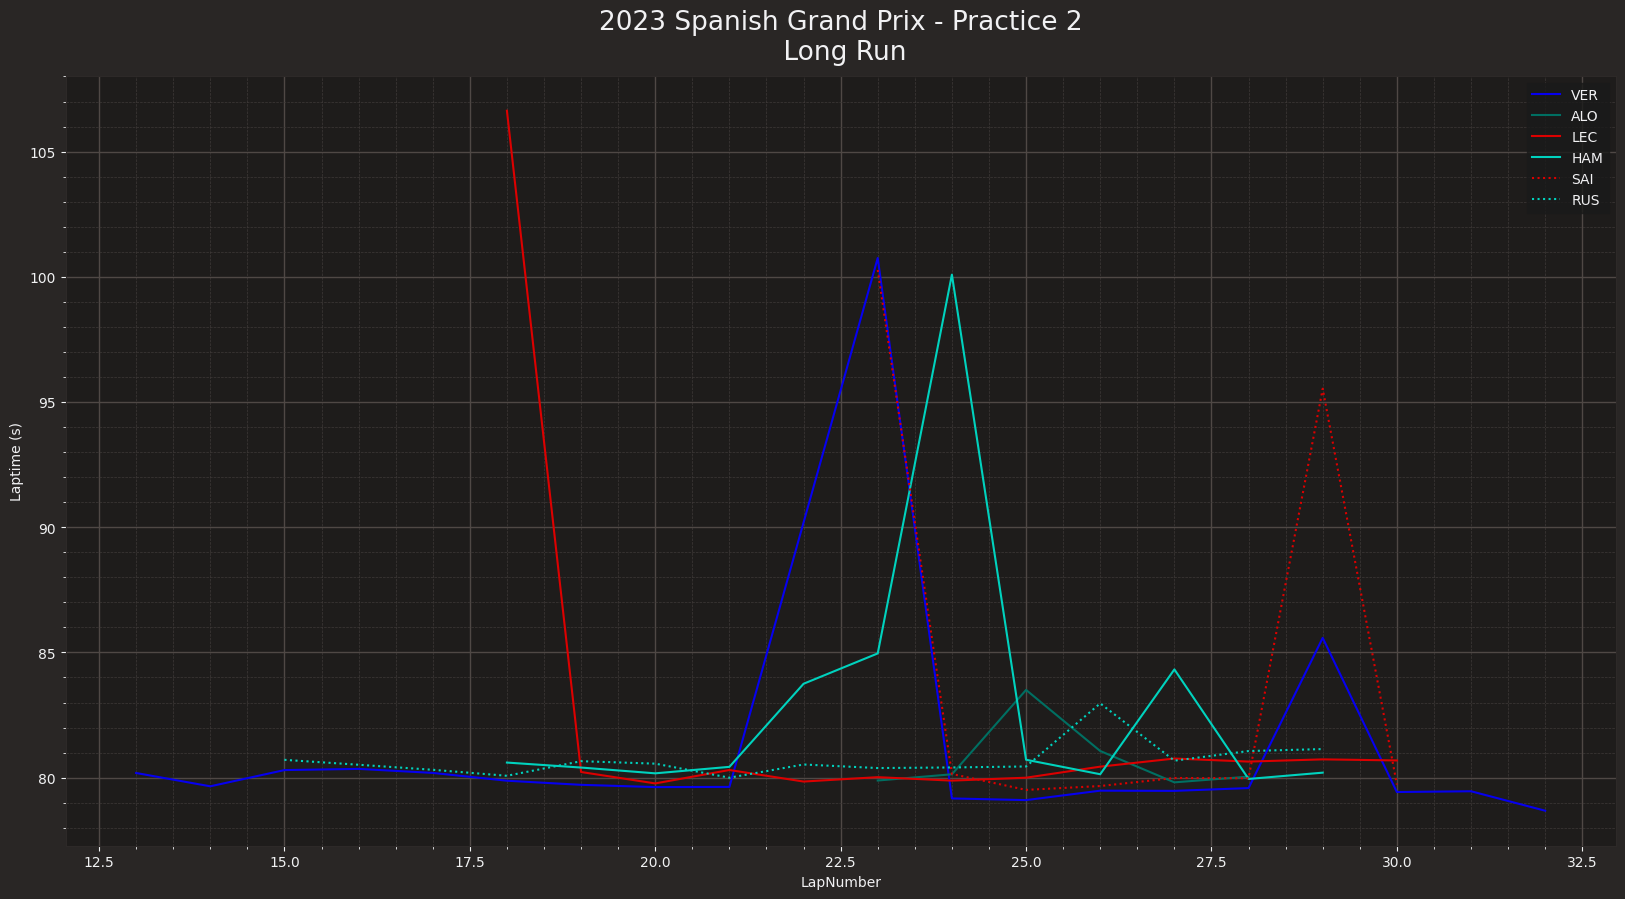

In [172]:
import pandas as pd
driver_laps = driver_laps.drop(driver_laps[driver_laps['LapTime(s)'] > 110].index)
drivers_to_visualize = ["VER", "ALO", "LEC", "HAM", "SAI", "RUS"]

# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [20, 10]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

# Lap-by-lap longrun comparison
for driver in drivers_to_visualize:
    single_driver_laps = driver_laps.pick_driver(driver)[['Driver', 'LapNumber', 'LapTime(s)', 'Team', 'TyreLife']]
  
    # Select all the laps from that driver
    single_driver_laps = single_driver_laps.dropna()
    
    # Extract the team for coloring purploses
    team = pd.unique(single_driver_laps['Team'])[0]
    
    # X-coordinate is the lap number
    x = single_driver_laps['LapNumber']
    
    # Y-coordinate a smoothed line between all the laptimes
    y = seconds=single_driver_laps['LapTime(s)']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=plotting.team_color(team), linestyle=linestyle)
    
    # Append labels
    ax.set(ylabel = 'Laptime (s)')
    ax.set(xlabel = 'LapNumber')
    
    # Set title
    ax.set_title(f"{fp.event.year} {fp.event.EventName} - {fp.name}\n Long Run")

    # Generate legend
    ax.legend()
    
    visualized_teams.append(team)